## learning-AI : deep learning application (61357002)
### assignment : diabetes regression (ML)

**당뇨 데이터를 KNR, ridge, lasso, decision tree, random forest, SVR 기법을 적용하여 regression**

<br>

- **임규연 (lky473736)**
- 2024.09.10.에 문서 작성
- **dataset** : https://github.com/plotly/datasets/blob/master/diabetes.csv
- **kaggle** : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
- **data abstract** : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

------

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## ML

**아래 목차에 따라 classification을 진행한다.**
- **(1) 데이터 탐색적 분석 및 데이터 처리**
- **(2) regression (random search)**
    - KNR : random search
    - logistic regression : random search
    - decision tree : random search
    - random forest : random search
    - SVR : random search

<br>

```CAUTION!``` : **여기서 진행하는 데이터 탐색적 분석 및 데이터 처리는 ./ML_classification_diabetes(assignment)와 동일하다.**

-----

### (1) 데이터 탐색적 분석 및 데이터 처리

분류 전, 데이터의 전반적인 분포를 파악하고 classification 전략을 세운다. 또한 Z-score normalization, label encoding 등의 전처리를 수행한다.

- **데이터 구조 파악 및 EDA**
    - 각 feature가 의미하는 바를 분석, 결측치 파악 후 어떻게 classification을 진행하는 것이 탁월할 지 파악
    - 각 feature에 대한 사분위수, mean, max, min, median, corr
    - seaborn을 통한 corr 상관관계 및 histplot 시각화
    - 각 attribute에 대한 box plot 시각화 및 outlier 확인
    - 각 feature에 대한 histgram
- **데이터 전처리**
    - 결측치 제거 및 평균값으로 대체
    - Z-score normalization
    - label encoding으로 인한 label 평탄화
    - oversampling과 undersampling

In [28]:
# 파일 열기, df의 행 갯수, 열 갯수, 각 열 명 파악

df = pd.read_csv('../data/diabetes.csv')
print (df.columns)
df.info()
df.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


header를 확인하니, 본 데이터프레임에서의 각 attribute는 다음과 같은 내용을 의미한다.

- **임신 횟수 (Pregnancies)** : 임신한 횟수
- **포도당 (Glucose)** : 경구 포도당 내성 검사에서 2시간 후의 혈장 포도당 농도
- **혈압 (BloodPressure)** : 이완기 혈압 (mm Hg)
- **피부 두께 (SkinThickness)** : 삼두근 피부 두께 (mm)
- **인슐린 (Insulin)** : 2시간 후의 혈청 인슐린 (mu U/ml)
- **체질량 지수 (BMI)** : 체질량 지수 (몸무게(kg) / (키(m))^2)
- **당뇨병 혈통 함수 (DiabetesPedigreeFunction)** : 당뇨병 혈통 함수
- **나이 (Age)** : 나이 (년)
- **결과 (Outcome)** : 클래스 변수 (0 또는 1)

여기서는 label을 Outcome 열로 두고, 나머지를 feature로 두어서 classification을 진행한다.

In [29]:
# df의 기본적인 통계량 수치 파악, 각 열마다의 데이터 타입 

for feature in df.columns :
    print (f'{feature}의 데이터 타입 : ', df[feature].dtype)

df.describe()

Pregnancies의 데이터 타입 :  int64
Glucose의 데이터 타입 :  int64
BloodPressure의 데이터 타입 :  int64
SkinThickness의 데이터 타입 :  int64
Insulin의 데이터 타입 :  int64
BMI의 데이터 타입 :  float64
DiabetesPedigreeFunction의 데이터 타입 :  float64
Age의 데이터 타입 :  int64
Outcome의 데이터 타입 :  int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Regression 전략을 세우자면 아래와 같다.

- **regression 전략**
    - 학습 전에 데이터를 아래와 같이 준비
        - 특성 변수 (feature) : 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'
        - 타겟 변수 (target) : 'BMI'
    - SVM, logistic regression 전에 스케일링 (Z-score normalization) 필요
    - param_grid를 먼저 설정하여서 각 모델에 맞는 model parameter의 적절한 값을 찾기 위해 random search를 고려한다.
    - **Outcome** 열을 제거한다. (범주형 변수를 제거)

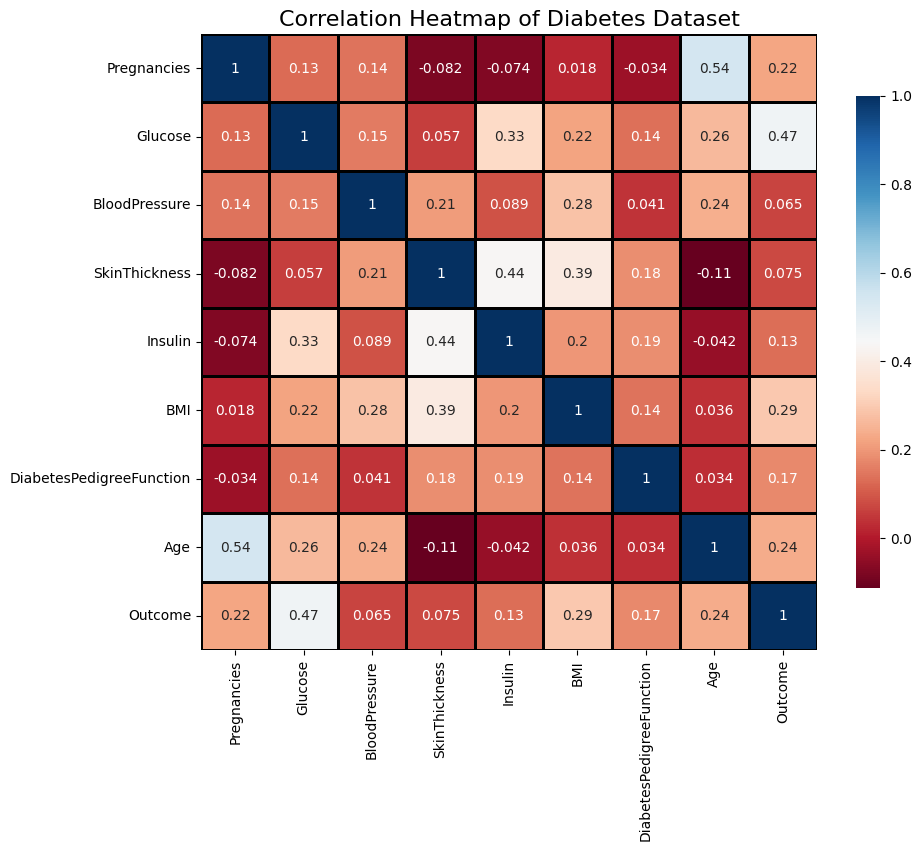

correlation for Pregnancies:
Pregnancies                 1.000000
Age                         0.544341
Outcome                     0.221898
BloodPressure               0.141282
Glucose                     0.129459
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Insulin                    -0.073535
SkinThickness              -0.081672
Name: Pregnancies, dtype: float64

correlation for Glucose:
Glucose                     1.000000
Outcome                     0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

correlation for BloodPressure:
BloodPressure               1.000000
BMI                         0.281805
Age                         0.239528
SkinThickness               0.207371
Glucose                     0.15259

In [30]:
# seaborn을 통하여 heatmap 시각화
# 상관계수 행렬, 각 변수 간의 선형적 관계를 시각적으로 표시

correlation_matrix = df[df.columns].corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=16)
plt.show()

for col in correlation_matrix.columns :
    sorted_corr = correlation_matrix[col].sort_values(ascending=False)
    print(f"correlation for {col}:")
    print(sorted_corr)
    print()

위 heatmap는 음수로 갈 수록 음의 상관관계(반비례), 양수로 갈 수록 양의 상관관계(정비례)를 의미한다. 또한 diagonal을 중심으로 각 part가 대칭이다. (symmetric) figure를 보고 주목해야 할 부분은 아래와 같이 분석할 수 있다.

**BMI와 상관계수가 높은 feature**은 아래와 같다.

    - SkinThickness (상관계수 0.39)
        - 체지방량이 증가하면 피부 두께도 증가할 가능성이 큼.
        - BMI는 체지방을 반영하는 지표
    - Insulin (상관계수 0.33)
        - BMI가 높은 사람은 대개 인슐린 저항성이 높고, 이에 따라 혈중 인슐린 수치도 높을 수 있음
    - Glucose (상관계수 0.22)
        - 비만은 종종 인슐린 저항성과 관련이 있다고 알려져 있음.
        - BMI가 높으면 당뇨병 위험이 증가할 수 있으므로, 혈당 수치와 어느 정도 상관관계를 보인다고 할 수 있음

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

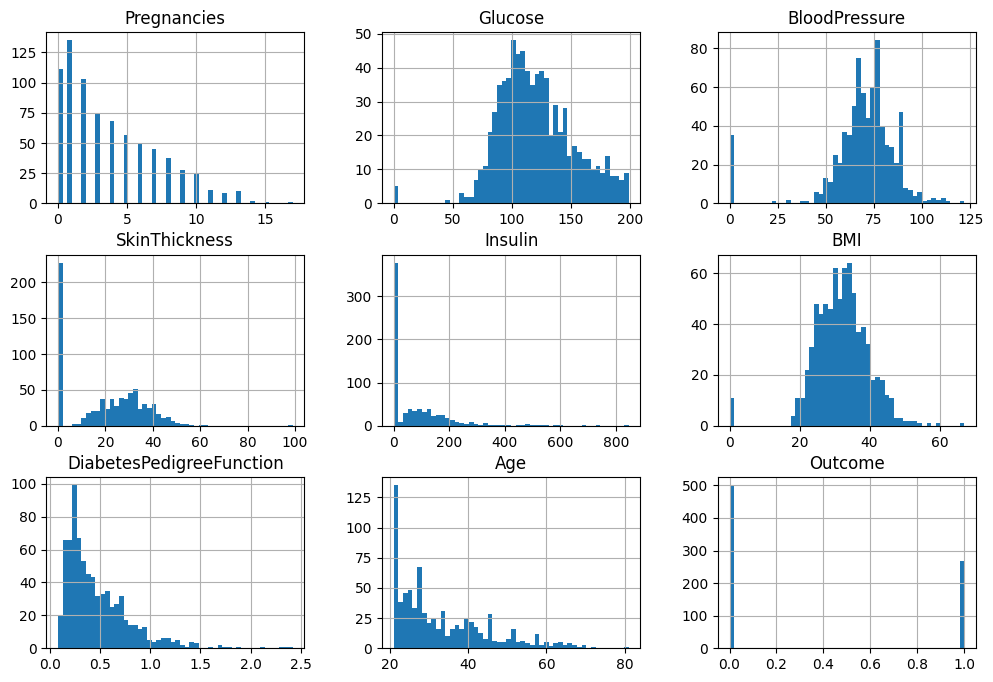

In [31]:
# histgram 시각화

df.hist(bins=50, figsize=(12, 8))

위 figure을 확인해보고 아래와 같은 생각을 하였다.

- DiabetesPedigreeFunction와 Age를 제외하면 전부 평균값을 기준으로 대칭인 표준정규분포 모양을 띄고 있다. 하지만 위 두 feature의 분포 때문에 추후 SVM, logistic regression 시에 overfitting을 야기할 수 있기 때문에 normalization을 진행한다.

- **Glucose, BloodPressure, SkinThickness, BMI**에서 0과 가깝게 해당되는 outlier가 있어 보인다. 따라서 이를 파악하기 위해 box-plot을 그려 확인한다.

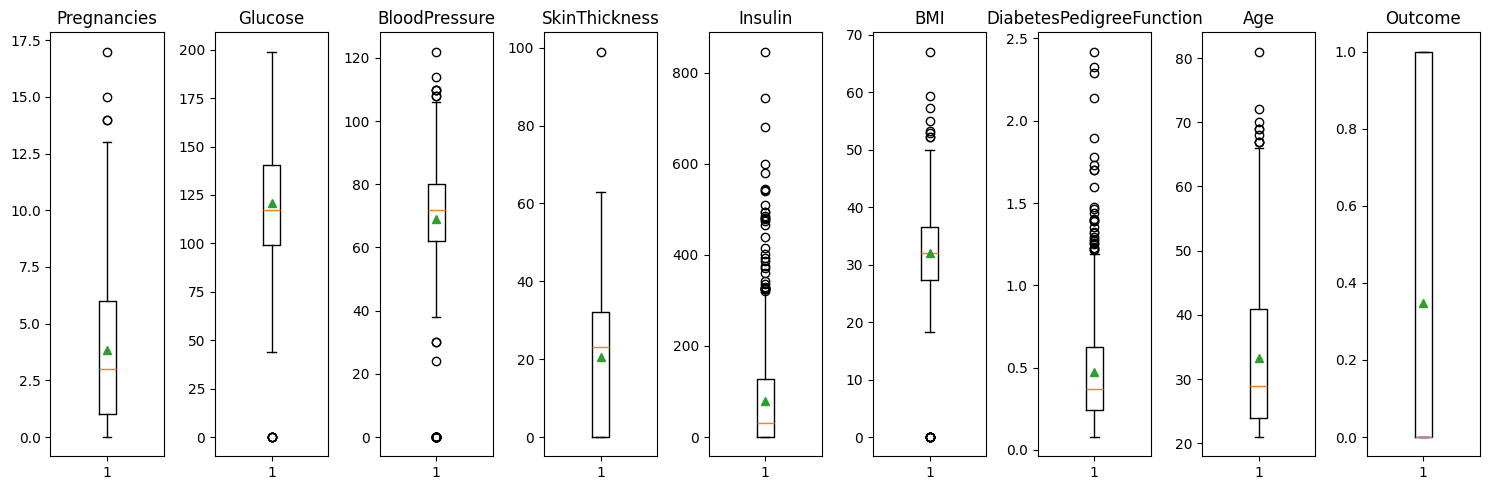

In [32]:
# box plot 그려 데이터 분포 확인

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

확인해보니, **Glucose, BloodPressure, BMI**에서 0과 가까운 outlier가 발생하고 있음을 확인 가능하다. **어떻게 인간이 포도당 수치가 0, 혈압이 0, BMI가 0일 수 있겠는가? outlier를 제거하도록 한다.**

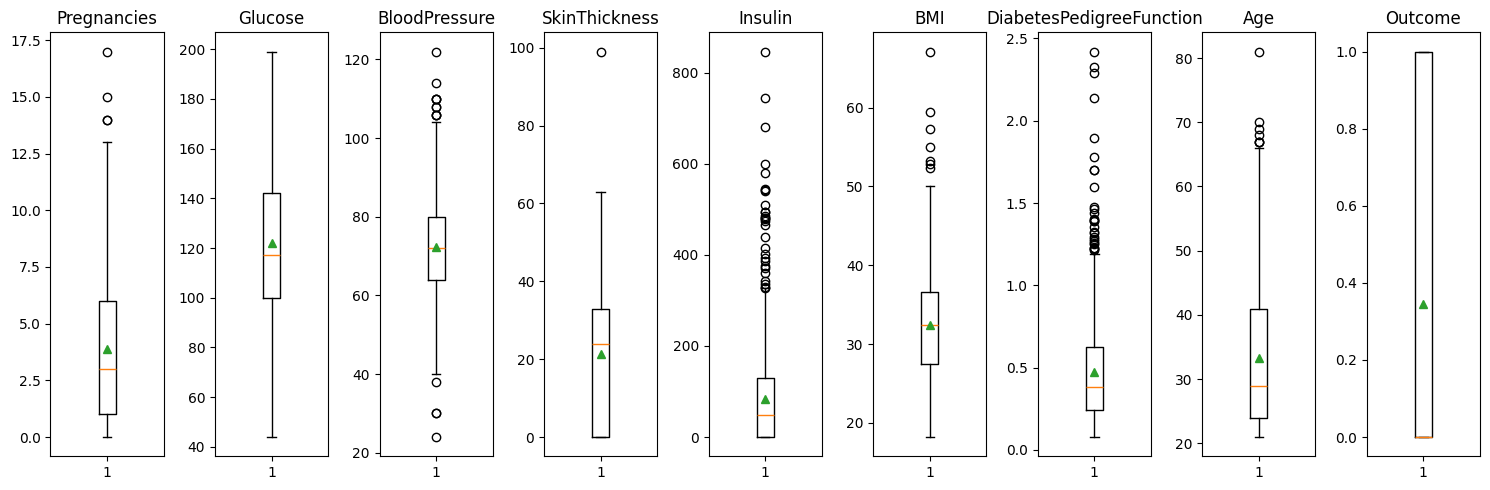

In [33]:
# outlier 제거 및 다시 boxplot 시각화

df = df[(df['BMI'] != 0) & (df['Glucose'] != 0) & (df['BloodPressure'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [34]:
# Z-score normalization

from sklearn.preprocessing import StandardScaler

normalizier = StandardScaler()

feature = df[[feature for feature in df.columns if feature != 'BMI' and feature != 'Outcome']] # Outcome 열을 제거해야 함
label = df['BMI']

feature_scaled = normalizier.fit_transform(feature)

feature_scaled_df = pd.DataFrame(feature, columns=feature.columns)

feature_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [35]:
# train set, test set, val set으로 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_scaled_df, label,
                                                   test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                   test_size=0.1) 

print ("train set : ", X_train.shape, y_train.shape)
print ("test set : ", X_test.shape, y_test.shape)
print ("val set : ", X_val.shape, y_val.shape)

train set :  (585, 7) (585,)
test set :  (73, 7) (73,)
val set :  (66, 7) (66,)


-----

### (2) random search를 통한 하이퍼파라미터 튜닝, regression

KNR, ridge, lasso, decision tree, random forest, SVR을 이용하여 regression을 수행한다. random search를 통하여 균등분포로 파라미터를 뽑아 가장 성능이 좋은 best_model을 추출해낼 것이다. 아래는 random search를 작동시킬 hyperparameter들의 range이다.


- **K-Nearest Neighbors (KNR)**
    - `n_neighbors`: `randint(1, 50)`
    - `weights`: `['uniform', 'distance']`
    - `p`: `randint(1, 2)` (1은 맨해튼 거리, 2는 유클리드 거리)

- **Support Vector Machine (SVM)**
    - `C`: `uniform(0.01, 100.0)`
    - `kernel`: `['linear', 'rbf']`
    - `gamma`: `['scale', 'auto']`

- **Decision Tree**
    - `max_features`: `['sqrt', 'log2', None]`
    - `max_depth`: `np.arange(5, 50, 5)`
    - `min_samples_leaf`: `np.arange(1, 50, 10)`
    - `criterion`: `['mse', 'mae']`

- **Random Forest**
    - `n_estimators`: `randint(50, 200)`
    - `max_depth`: `randint(1, 50)`
    - `min_samples_split`: `randint(2, 50)`
    - `min_samples_leaf`: `randint(1, 50)`
    - `bootstrap`: `[True, False]`

- **Ridge**
    - `alpha`: `uniform(0.01, 10.0)`
    - `solver`: `['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']`
    - `max_iter`: `randint(100, 1000)`

- **Lasso**
    - `alpha`: `uniform(0.01, 10.0)`
    - `max_iter`: `randint(100, 1000)`
    - `selection`: `['cyclic', 'random']`


In [36]:
# random search에 사용될 각 parameter의 scale을 dictionary로 정리
# model list 정의

from scipy.stats import uniform, randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

models = {
    "KNR": KNeighborsRegressor(),
    # "logistic regression": LogisticRegression(max_iter=1000),  # max_iter 기본값 설정
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    "SVR": SVR(),
    "decision tree": DecisionTreeRegressor(),
    "random forest": RandomForestRegressor()
}

param_scale = {
    "KNR": {
        'n_neighbors': randint(1, 50),
        'weights': ['uniform', 'distance'],
        'p': randint(1, 2)
    },
    
    "logistic regression": {
        'C': uniform(0.01, 10.0),
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': randint(100, 1000)
    },
    
    "SVR": {
        'C': uniform(0.01, 100.0),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    
    "decision tree": {
        'max_features': ['sqrt', 'log2', None],
        'max_depth': np.arange(5, 50, 5),
        'min_samples_leaf': np.arange(1, 50, 10),
        'criterion':['squared_error']
    },
    
    "random forest":  {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 50),
        'min_samples_leaf': randint(1, 50),
        'bootstrap': [True, False]
    },
    
    "ridge" : {
        'alpha': uniform(0.01, 10.0),
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter': randint(100, 1000)
    },

    "lasso" : {
        'alpha': uniform(0.01, 10.0),
        'max_iter': randint(100, 1000),
        'selection': ['cyclic', 'random']
    }
}

여기서는 모든 모델을 순서대로 학습시키기 위하여, 사용자 지정함수를 생성하여 구현한다. 

- 여기서 사용자 지정 함수명은 **model_fit_procedurally**
    - 이전에 회귀 버전으로 작성한 https://github.com/lky473736/learning-AI/blob/main/report/vehicle/ML_regression_vehicle.ipynb 에서의 **model_fit_procedurally**와 logic은 동일하다.
- model_fit_procedurally의 paramter는 model_name, X_train, y_train, X_val, y_val, X_test, y_test이다.
    - model_name은 여기서 model의 이름을 의미한다. (models 딕셔너리에서 keys에 해당)
    - models를 model_name으로 접근할 예정, model의 api를 의미한다. (models 딕셔너리에서 values에 해당)
- **각 모델에 대해 random search -> best_model 도출 및 parameter 출력 + fit -> fit 후에 MSE 계산 및 출력 -> results에 MSE, r^2 저장 순으로 진행**
- random search의 scoring에 **neg_mean_squared_error**를 사용한다.
    - Reference : https://velog.io/@ann9902/%EC%95%99%EC%83%81%EB%B8%94
    - scikit-learn의 내부 원리에 의해, 높을 수록 좋은 효용 함수를 적용하기 때문에, MSE의 반대를 계산한다.

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

def model_fit_procedurally(model_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # CAUTION!
    # 여기서 X_train, y_train ... <-- 이 set은 지역변수이므로, 기존 train set, val set, test set에 영향을 끼치지 않음
    
    print(f"************** Activated : {model_name} **************")
    
    random_search = RandomizedSearchCV(
        models[model_name], param_scale[model_name], 
        n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Random search 진행
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    
    # Train MSE, R^2
    y_train_pred = best_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Validation MSE, R^2
    y_val_pred = best_model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Test MSE, R^2
    y_test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    result = {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'val_mse': val_mse,
        'val_r2': val_r2,
        'test_mse': test_mse,
        'test_r2': test_r2
    }
    
    best_params = random_search.best_params_
    
    print(f"{model_name} | best params : {best_params}")
    print(f"{model_name} | train MSE : {train_mse}, R^2: {train_r2}")
    print(f"{model_name} | validation MSE : {val_mse}, R^2: {val_r2}")
    print(f"{model_name} | test MSE : {test_mse}, R^2: {test_r2}")
    
    return result, best_params, best_model


In [38]:
# fit

import time

results = {}

for model_name in models.keys() :
    start_time = time.time() # 각 모델별로 소요 시간 측정
    
    rst, _, best_model = model_fit_procedurally(model_name, 
                                          X_train, y_train,
                                          X_val, y_val,
                                          X_test, y_test)
    
    end_time = time.time()
    
    print ("turnaround time: ", end_time - start_time)
    print()
    
    results[model_name] = [rst]
    
    try : 
        results[model_name].append (best_model)
    except : 
        pass
    
print (results)

************** Activated : KNR **************
KNR | best params : {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
KNR | train MSE : 0.0, R^2: 1.0
KNR | validation MSE : 48.17154207249805, R^2: 0.25341471690969897
KNR | test MSE : 41.108526178631095, R^2: 0.272692099813856
turnaround time:  2.475066900253296

************** Activated : ridge **************


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

ridge | best params : {'alpha': 9.769749017752403, 'max_iter': 921, 'solver': 'sparse_cg'}
ridge | train MSE : 32.253439424168896, R^2: 0.26682554527760405
ridge | validation MSE : 49.46513464534982, R^2: 0.23336600898682303
ridge | test MSE : 45.626024502794536, R^2: 0.19276677712131807
turnaround time:  0.46692609786987305

************** Activated : lasso **************
lasso | best params : {'alpha': 0.031292089182438636, 'max_iter': 543, 'selection': 'random'}
lasso | train MSE : 32.258315928086475, R^2: 0.2667146942128943
lasso | validation MSE : 49.49489057161116, R^2: 0.2329048376048065
lasso | test MSE : 45.60317789529551, R^2: 0.19317098811283562
turnaround time:  0.23667621612548828

************** Activated : SVR **************
SVR | best params : {'C': 99.5927676755673, 'gamma': 'scale', 'kernel': 'rbf'}
SVR | train MSE : 26.082946954655426, R^2: 0.40709112725811447
SVR | validation MSE : 46.44830390301458, R^2: 0.28012227496668585
SVR | test MSE : 38.02174206693147, R^2: 

KNR
ridge
lasso
SVR
decision tree
random forest


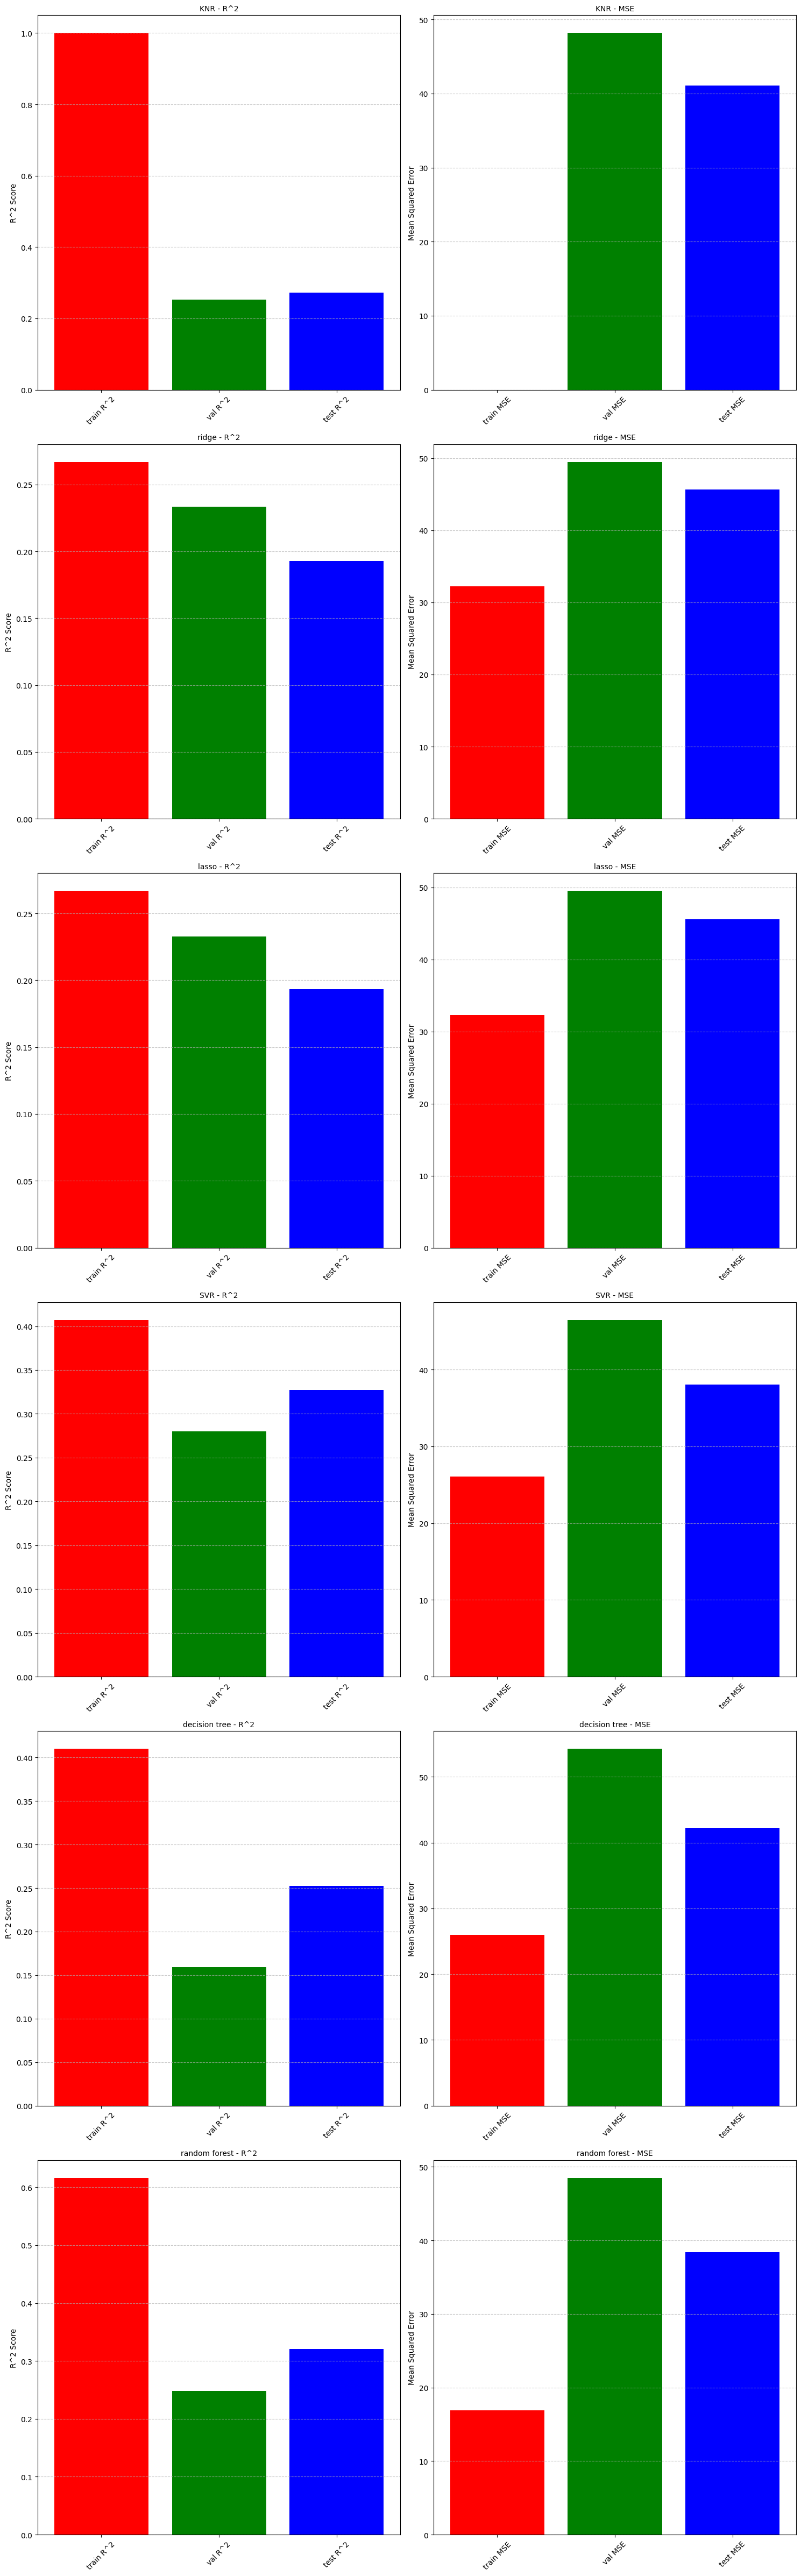

In [39]:
# visualization each acc, loss

import matplotlib.pyplot as plt

model_names = [name for name in models.keys()]
for name in model_names : 
    print (name)

fig, axes = plt.subplots(len(model_names), 2, figsize=(15, len(model_names) * 8))

for i, model in enumerate(model_names) :
    axes[i][0].bar(['train R^2', 'val R^2', 'test R^2'], 
                   [results[model][0]['train_r2'], 
                    results[model][0]['val_r2'], 
                    results[model][0]['test_r2']],
                  color=['r', 'g', 'b'])
    
    axes[i][0].set_title(f'{model} - R^2', fontsize=10)
    axes[i][0].set_ylabel('R^2 Score')
    axes[i][0].tick_params(axis='x', rotation=45)
    axes[i][0].grid(True, axis='y', linestyle='--', alpha=0.7)

    axes[i][1].bar(['train MSE', 'val MSE', 'test MSE'], 
                   [results[model][0]['train_mse'], 
                    results[model][0]['val_mse'], 
                    results[model][0]['test_mse']],
                   color=['r', 'g', 'b'])
    
    axes[i][1].set_title(f'{model} - MSE', fontsize=10)
    axes[i][1].set_ylabel('Mean Squared Error')
    axes[i][1].tick_params(axis='x', rotation=45)
    axes[i][1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


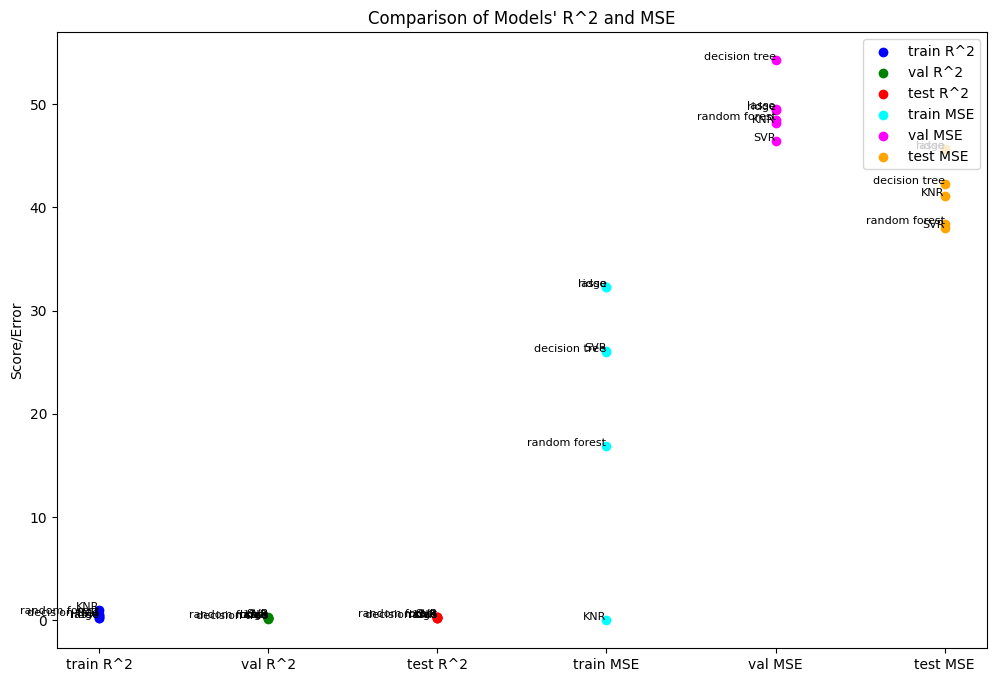

In [48]:
# scatter로 각 모델별로의 accuracy와 loss의 대소 비교 수행

train_r2 = [results[model][0]['train_r2'] for model in model_names]
val_r2 = [results[model][0]['val_r2'] for model in model_names]
test_r2 = [results[model][0]['test_r2'] for model in model_names]
train_mse = [results[model][0]['train_mse'] for model in model_names]
val_mse = [results[model][0]['val_mse'] for model in model_names]
test_mse = [results[model][0]['test_mse'] for model in model_names]

plt.figure(figsize=(12, 8))

# R^2
plt.scatter([1]*len(model_names), train_r2, color='blue', label='train R^2')
plt.scatter([2]*len(model_names), val_r2, color='green', label='val R^2')
plt.scatter([3]*len(model_names), test_r2, color='red', label='test R^2')

# MSE
plt.scatter([4]*len(model_names), train_mse, color='cyan', label='train MSE')
plt.scatter([5]*len(model_names), val_mse, color='magenta', label='val MSE')
plt.scatter([6]*len(model_names), test_mse, color='orange', label='test MSE')

for i, model in enumerate(model_names):
    plt.text(1, train_r2[i], model, fontsize=8, ha='right')
    plt.text(2, val_r2[i], model, fontsize=8, ha='right')
    plt.text(3, test_r2[i], model, fontsize=8, ha='right')
    plt.text(4, train_mse[i], model, fontsize=8, ha='right')
    plt.text(5, val_mse[i], model, fontsize=8, ha='right')
    plt.text(6, test_mse[i], model, fontsize=8, ha='right')

plt.xticks([1, 2, 3, 4, 5, 6], ['train R^2', 'val R^2', 'test R^2', 
                                 'train MSE', 'val MSE', 'test MSE']) # 축에 이름 붙이기
plt.title("Comparison of Models' R^2 and MSE")
plt.ylabel('Score/Error')
plt.legend(loc='upper right')
plt.show()
